# 그래프 실습 문제집 (연습용)

이 노트북은 `graph_practice_dataset.csv` 데이터를 이용해 그래프 이론에서 다룬 시각화들을 모두 연습하도록 구성되었습니다.

포함 그래프 유형:
1. Line Plot (추세)
2. Bar Chart (범주 비교)
3. Grouped Bar (범주+세그먼트 비교)
4. Pie Chart (비율)
5. Histogram (분포)
6. Box Plot (이상치/중앙값)
7. Scatter Plot (상관관계)
8. Heatmap (행/열 매핑)
9. Twin Axis (서로 다른 단위)
10. Log Scale 시각화
11. 강조 색상 하이라이트
12. Annotation(주석)
13. 3C 원칙(명확성/일관성/맥락)

※ 먼저 아래 셀을 실행해 데이터프레임을 불러오세요.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv(r"C:\fintech3\06machine_learning\data\04_graph_practice_dataset.csv",encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df.head()

,날짜,지역,제품,매출,이익,고객수,카테고리
0,2024-01-31,서울,A,182,34.916660,930.986807,전자
1,2024-02-29,서울,A,131,21.843166,998.727403,전자
2,2024-03-31,서울,A,172,22.114619,1203.880436,전자
3,2024-04-30,서울,A,94,21.636703,491.932862,전자
4,2024-05-31,서울,A,186,20.698511,1835.592633,전자


## 문제 1️⃣: 월별 전체 매출 추세 (Line Plot)

- `날짜`별 총 `매출`을 선 그래프로 나타내세요.
- `marker='o'`, `linewidth=2`, `grid=True`를 적용하세요.
- 그래프 제목: `월별 매출 추이`

In [23]:
df_monthly = df.set_index('날짜').resample('ME')['매출'].sum().reset_index()

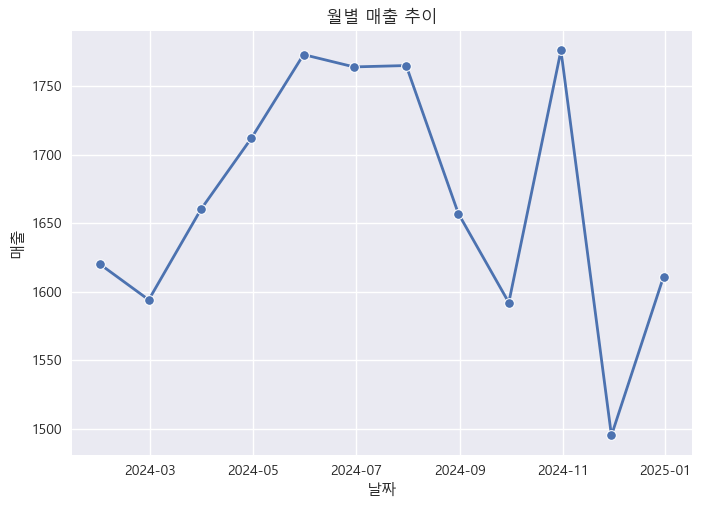

In [24]:
# TODO: 월별 매출 추세 그래프를 그리세요.
plt.figure() 
sns.lineplot(data=df_monthly, x='날짜', y='매출', marker='o', linewidth=2)
plt.grid(True)
plt.title('월별 매출 추이')
plt.show()

## 문제 2️⃣: 지역별 매출 추세 비교

- 각 `지역`별로 월별 매출 합계를 구하고 한 그래프에 여러 선으로 그리세요.
- 범례(legend)를 추가하세요.
- 제목: `지역별 월별 매출 비교`

In [27]:
df.columns

Index(['날짜', '지역', '제품', '매출', '이익', '고객수', '카테고리'], dtype='object')

In [28]:
df_monthly_region = df.set_index('날짜').groupby('지역').resample('ME')['매출'].sum().reset_index()

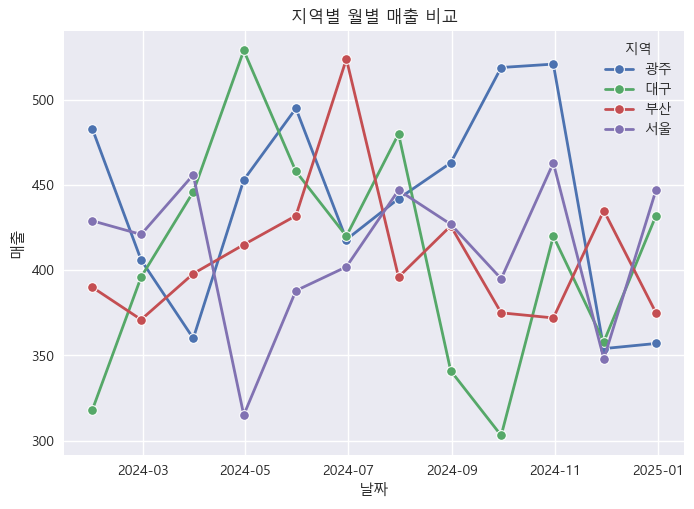

In [29]:
# TODO: 지역별 월별 매출을 선 그래프로 여러 개 겹쳐 그리세요.
plt.figure() 
sns.lineplot(data=df_monthly_region, x='날짜', y='매출', hue='지역', marker='o', linewidth=2)
plt.grid(True)
plt.title('지역별 월별 매출 비교')
plt.show()

## 문제 3️⃣: 지역별 평균 매출 (Bar Chart)

- `지역`별 평균 `매출`을 막대 그래프로 나타내세요.
- x축: 지역 / y축: 평균 매출
- 제목: `지역별 평균 매출`

In [31]:
df_region_avg = df.groupby('지역')['매출'].mean().reset_index()

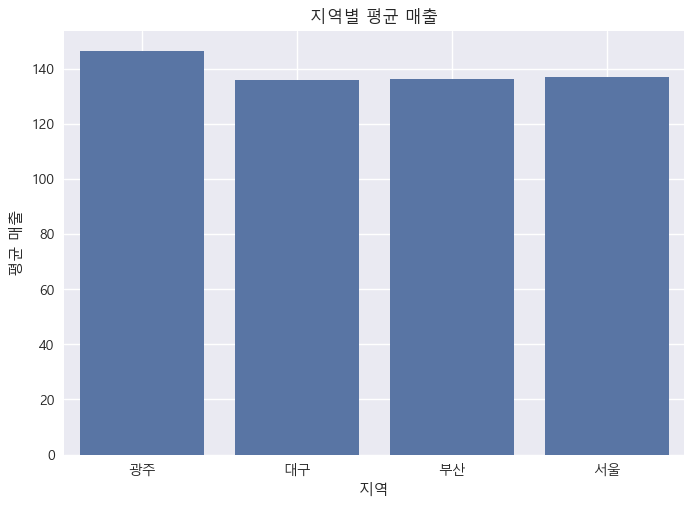

In [35]:
# TODO: 지역별 평균 매출 막대그래프를 그리세요.
plt.figure() 
sns.barplot(data=df_region_avg, x='지역', y='매출')
plt.grid(True)
plt.title('지역별 평균 매출')
plt.xlabel('지역')
plt.ylabel('평균 매출')
plt.show()

## 문제 4️⃣: 지역 vs 제품별 매출 (Grouped Bar)

- x축에 지역을 두고, 제품을 `hue`(또는 막대 그룹)로 나누어 비교하세요.
- 지역 안에서 제품 A, B, C의 평균 매출 차이를 확인합니다.
- 제목: `지역별 제품 평균 매출 비교`

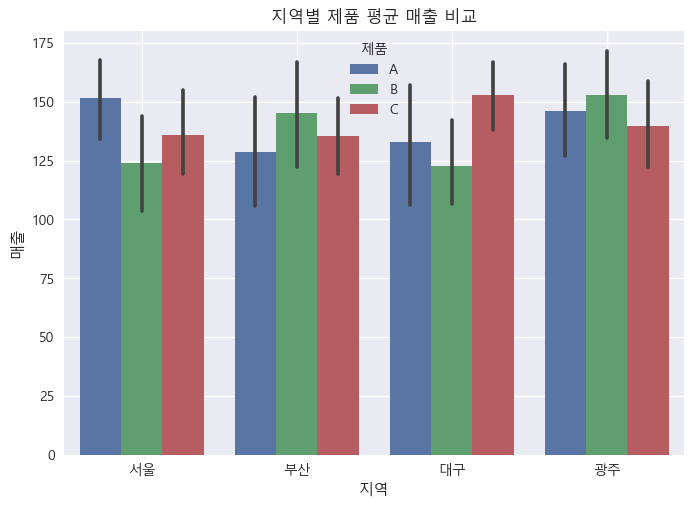

In [37]:
# TODO: 지역-제품별 평균 매출을 그룹 막대그래프로 시각화하세요.
plt.figure() 
sns.barplot(data=df, x='지역', y='매출', hue='제품')
plt.grid(True)
plt.title('지역별 제품 평균 매출 비교')
plt.show()

## 문제 5️⃣: 제품별 총매출 비중 (Pie Chart)

- 전체 기간 동안 제품 A, B, C가 차지하는 총 매출 비율을 원형 그래프로 나타내세요.
- `autopct='%.1f%%'` 옵션을 사용하세요.
- 제목: `제품별 매출 비중`

In [38]:
df_product_sum = df.groupby('제품')['매출'].sum()

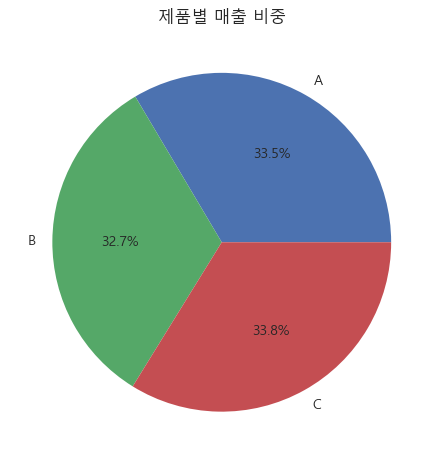

In [39]:
# TODO: 제품별 총매출 비중을 원형 차트로 표현하세요.
plt.figure
plt.pie(x=df_product_sum, labels=df_product_sum.index,autopct='%.1f%%') #labels=df_product_sum.index: 조각 이름
plt.title('제품별 매출 비중')
plt.show()

## 문제 6️⃣: 이익 분포 (Histogram)

- 전체 행에 대해 `이익` 값의 분포를 히스토그램으로 그리세요.
- bin 개수는 15로 설정하세요.
- 제목: `이익 분포`

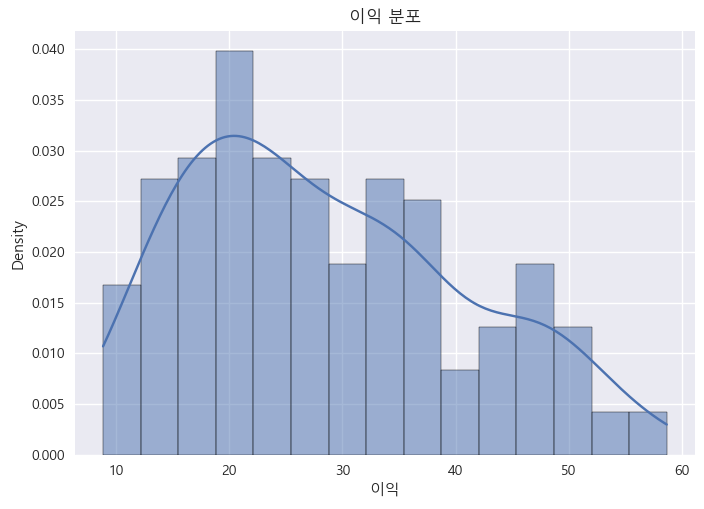

In [40]:
# TODO: 이익 분포를 히스토그램으로 시각화하세요.
plt.figure()
sns.histplot(df['이익'], bins = 15, stat='density', kde=True) 
plt.title('이익 분포')
plt.show()

## 문제 7️⃣: 제품별 이익 분포 (Box Plot)

- 제품별 `이익` 분포를 박스플롯으로 표현하세요.
- 중앙값, 이상치 등을 비교합니다.
- 제목: `제품별 이익 분포`

In [42]:
df.columns

Index(['날짜', '지역', '제품', '매출', '이익', '고객수', '카테고리'], dtype='object')

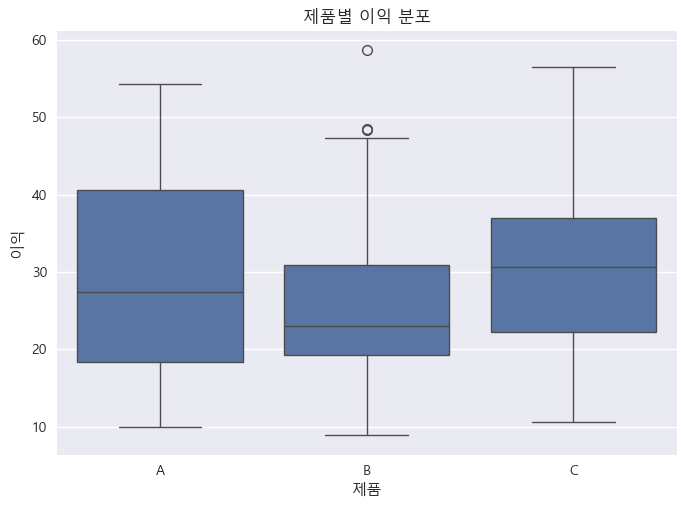

In [44]:
# TODO: 제품별 이익 분포를 박스플롯으로 시각화하세요.
plt.figure()
sns.boxplot(data=df, x='제품', y='이익')
plt.title('제품별 이익 분포')
plt.show()

## 문제 8️⃣: 매출 vs 이익 (Scatter Plot)

- x축: `매출`, y축: `이익` 산점도를 그리세요.
- 점 색깔은 `지역`에 따라 다르게 하세요.
- 제목: `매출과 이익의 관계`

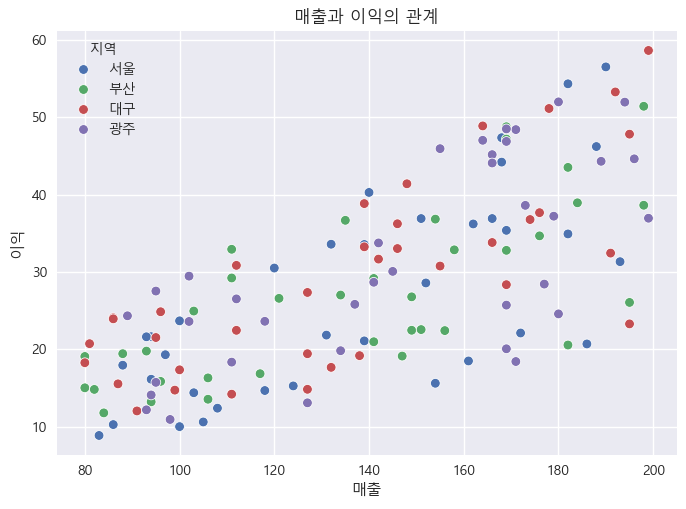

In [48]:
# TODO: 매출-이익 산점도를 그리고 지역별로 색을 구분하세요.
plt.figure()
sns.scatterplot(data=df, x='매출', y='이익',hue='지역') #hue:색깔, style:모양
plt.title('매출과 이익의 관계')
plt.show()

## 문제 9️⃣: 지역 × 제품 매출 Heatmap

- `지역`(행)과 `제품`(열)을 기준으로 평균 `매출` pivot_table을 만드세요.
- 그 결과를 heatmap으로 시각화하세요.
- 제목: `지역-제품 평균 매출 히트맵`

In [55]:
table = df.pivot_table(index='지역', columns='제품', values='매출')
table

제품,A,B,C
지역,,,
광주,146.333333,153.166667,139.750000
대구,132.833333,122.666667,152.916667
부산,128.500000,145.250000,135.333333
서울,151.666667,123.833333,136.000000


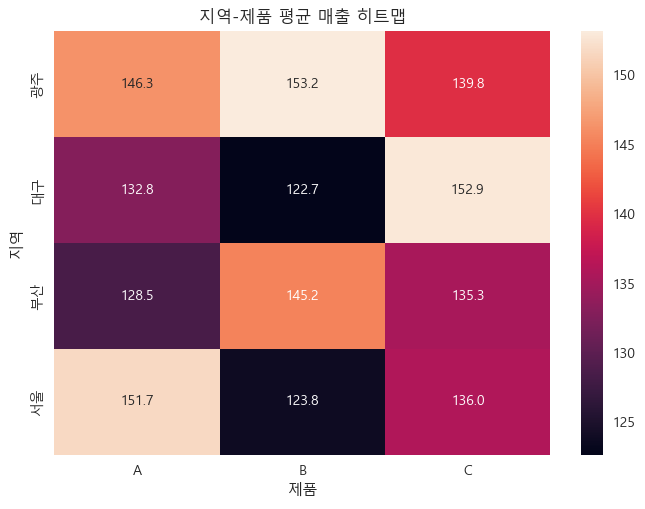

In [57]:
# TODO: 지역×제품 평균 매출을 피벗테이블로 만들고 heatmap으로 시각화하세요.
table = df.pivot_table(index='지역', columns='제품', values='매출')
plt.figure()
sns.heatmap(table, annot=True, fmt='.1f') # fmt='.1f'는 소수점 첫째자리까지
plt.title('지역-제품 평균 매출 히트맵')
plt.show()

💡heatmap에서는 "내 의도대로" 숫자를 표시하는 f (실수)나 d (정수)를 더 많이 씁니다.

* fmt='.1f': (가장 많이 씀) 소수점 첫째 자리(.1)까지 실수(f)로 보여줘 (예: 150.3)

* fmt='.0f': 소수점 없이(.0) 실수(f)로 보여줘 (예: 150)

* fmt='d': 무조건 정수(d)로 보여줘 (예: 150)

  * fmt='g'는 "숫자 서식(format)을 일반(General) 형식으로 보여줘"

💡annot는 **"Annotation" (주석)**의 줄임말입니다.

* 히트맵(Heatmap)의 각 네모 칸 안에 숫자 값을 표시할지 말지 결정하는 스위치입니다.

* 1. annot=True (True = "응, 보여줘!")
  * 의미: "숫자(값)를 칸 안에 보여줘."
  * 결과: 히트맵의 색깔뿐만 아니라 150.3 같은 실제 숫자도 각 칸에 표시됩니다.

* 2. annot=False (False = "아니, 숨겨!")
  * 의미: "숫자(값)를 칸 안에 숨겨줘." (이게 기본값입니다)
  * 결과: 색깔만 보이고 숫자는 표시되지 않습니다.

annot=True는 fmt= (숫자 서식) 옵션과 단짝

## 문제 🔟: 매출 vs 고객수 (Twin Axis)

- x축은 `날짜`.
- 왼쪽 y축: 월별 총 매출 (막대그래프)
- 오른쪽 y축: 월별 총 고객수 (선 그래프)
- 제목: `월별 매출과 고객 수 추이`
- 힌트: `ax1.twinx()`

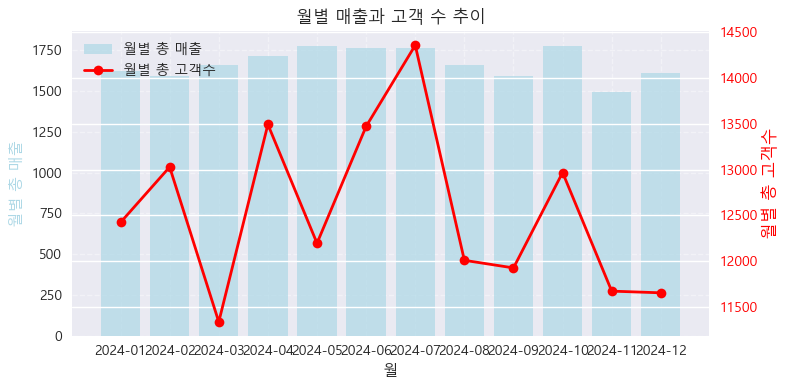

In [58]:
# TODO: 매출 막대 + 고객수 선을 twinx로 그리세요.
df_monthly = df.set_index('날짜').resample('ME').agg({'매출': 'sum','고객수': 'sum'}).reset_index()
df_monthly['월'] = df_monthly['날짜'].dt.strftime('%Y-%m')

fig, ax1 = plt.subplots(figsize=(8,4)) 

ax1.bar(df_monthly['월'], df_monthly['매출'], color='lightblue', alpha=0.7, label='월별 총 매출')
ax1.set_xlabel('월')
ax1.set_ylabel('월별 총 매출', color='lightblue')

ax2 = ax1.twinx()
ax2.plot(df_monthly['월'], df_monthly['고객수'], color='red', marker='o', linewidth=2, label='월별 총 고객수')
ax2.set_ylabel('월별 총 고객수', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')


plt.title('월별 매출과 고객 수 추이')
ax1.grid(True, linestyle='--', alpha=0.4)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=False)

plt.tight_layout() 
plt.show()

## 문제 1️⃣1️⃣: 로그 스케일 시각화

- 어떤 제품-지역 조합의 `고객수`는 다른 조합보다 훨씬 클 수 있습니다.
- `고객수` 평균을 제품별로 집계한 후 막대그래프를 그리고,
  같은 데이터를 y축을 로그 스케일(`plt.yscale('log')`)로도 시각화하세요.
- 제목: `제품별 평균 고객 수 (일반 축)` / `제품별 평균 고객 수 (로그 축)`

In [59]:
df_product_avg_customer = df.groupby('제품')['고객수'].mean().reset_index()

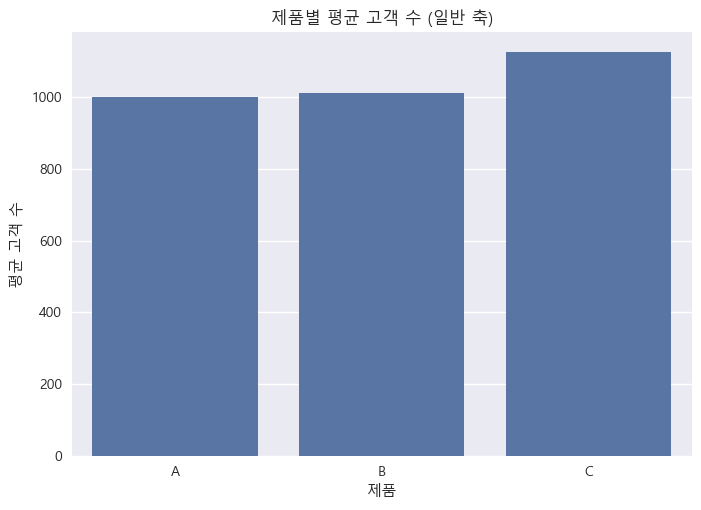

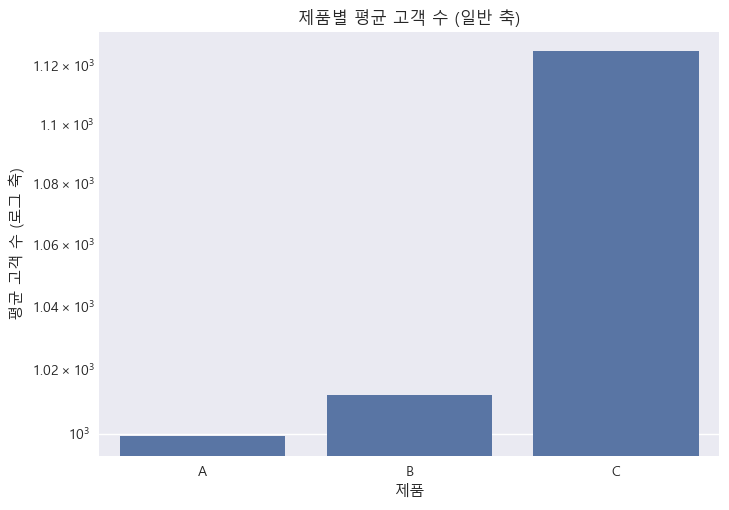

In [61]:
# TODO: 제품별 평균 고객수를 막대그래프로 그리고, 두 번째 그래프는 y축 로그 스케일로 표현하세요.
plt.figure()
sns.barplot(data=df_product_avg_customer, x='제품', y='고객수')
plt.title('제품별 평균 고객 수 (일반 축)')
plt.ylabel('평균 고객 수')
plt.show()

plt.figure()
sns.barplot(data=df_product_avg_customer, x='제품', y='고객수')
plt.yscale('log')
plt.title('제품별 평균 고객 수 (일반 축)')
plt.ylabel('평균 고객 수 (로그 축)')
plt.show()

## 문제 1️⃣2️⃣: 이상치 강조 (색상 강조)

- 월별 총 매출을 막대그래프로 그리되,
  평균보다 높은 달은 빨간색, 낮은 달은 파란색으로 칠하세요.
- 제목: `월별 매출 (평균 대비 강조)`

In [62]:
df_monthly = df.set_index('날짜').resample('ME')['매출'].sum().reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1480\3257440940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_monthly, x='월', y='매출',palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1480\3257440940.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


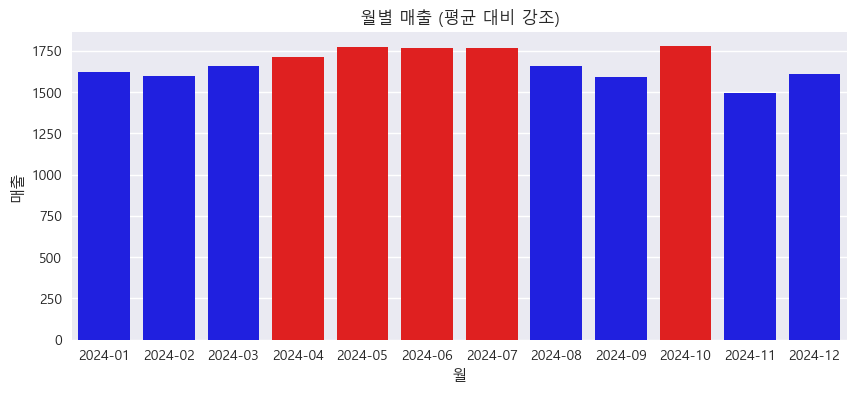

In [67]:
overall_avg = df_monthly['매출'].mean()

colors = ['red' if x > overall_avg else 'blue' for x in df_monthly['매출']]

df_monthly['월'] = df_monthly['날짜'].dt.strftime('%Y-%m')
plt.figure(figsize=(10,4))

sns.barplot(data=df_monthly, x='월', y='매출',palette=colors)
plt.title('월별 매출 (평균 대비 강조)')
plt.legend()
plt.show()

## 문제 1️⃣3️⃣: 주석(Annotation)으로 포인트 강조

- 월별 총 고객수를 선 그래프로 나타내세요.
- 가장 큰 값을 찍은 달에 화살표와 텍스트로 `고객 급증`이라고 표시하세요.
- 제목: `월별 고객 수 추이`

In [68]:
df_monthly_cust = df.set_index('날짜').resample('ME')['고객수'].sum().reset_index()
df_monthly_cust['월'] = df_monthly_cust['날짜'].dt.strftime('%Y-%m')

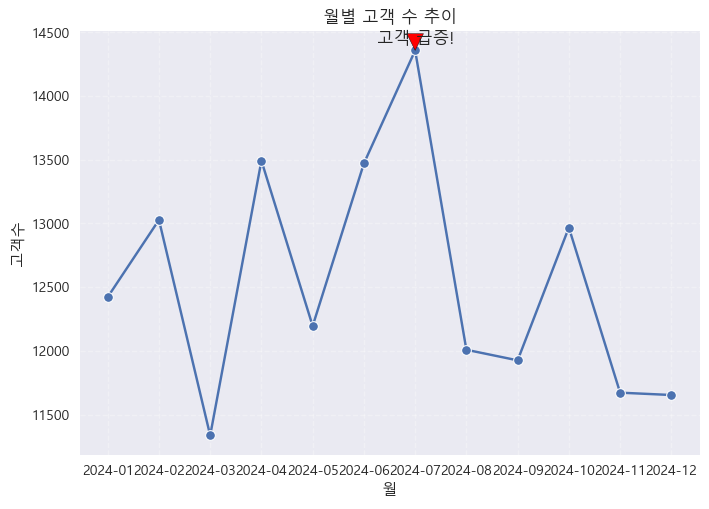

In [72]:
max_idx = df_monthly_cust['고객수'].idxmax()
max_month = df_monthly_cust.loc[max_idx, '월']
max_value = df_monthly_cust.loc[max_idx, '고객수']

plt.figure()
ax = sns.lineplot(data=df_monthly_cust, x='월', y='고객수', marker='o')
ax.annotate(
text='고객 급증!',xy=(max_month, max_value), xytext=(max_month, max_value + 50), arrowprops=dict(facecolor='red', shrink=0.05), 
    fontsize=12, ha='center')

plt.title('월별 고객 수 추이')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

## 문제 1️⃣4️⃣: 3C 원칙 (Clarity / Consistency / Context)

- `카테고리`별 총 매출을 막대그래프로 나타내세요.
- 그래프에 아래 사항을 모두 반영하세요:
  - 제목에 기간(2024년)과 단위(매출 합계)를 명시할 것
  - x축/y축 라벨 추가
  - grid는 약하게 표시 (`alpha=0.3`)
  - legend는 숨기거나 frameon=False 로 처리해 시각적 노이즈 최소화
- 제목 예시: `2024년 카테고리별 매출 합계 (단위: 임의 금액)`

In [71]:
df_category_sum = df.groupby('카테고리')['매출'].sum().reset_index()

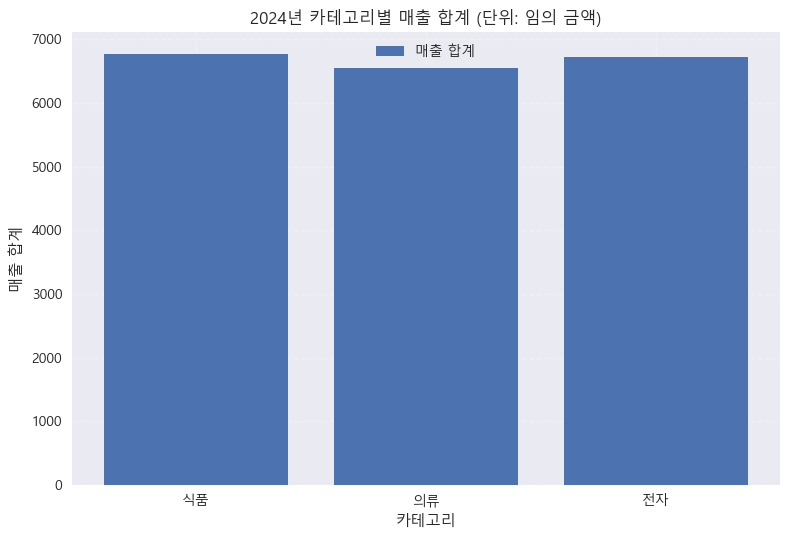

In [73]:
# TODO: 3C 원칙(명확성/일관성/맥락)을 지키는 카테고리별 매출 그래프를 작성하세요.
plt.figure() 
plt.bar(df_category_sum['카테고리'], df_category_sum['매출'],label='매출 합계')
plt.title('2024년 카테고리별 매출 합계 (단위: 임의 금액)')

plt.xlabel('카테고리')
plt.ylabel('매출 합계')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

---
### ✅ 끝!
이 문제들로 라인, 막대, 그룹막대, 파이, 히스토그램, 박스, 산점도, 히트맵, twinx, 로그스케일, 강조색, 주석, 3C 원칙까지 모두 연습할 수 있습니다.
수업에서는 보통:
1. 문제만 있는 버전으로 실습 →
2. 정답 포함 버전으로 복습/해설
순서로 진행하면 효과가 매우 좋습니다.
